In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
##Read Data set and see top and bottom rows to have quick glimpse of data
df=pd.read_csv("cyberbullying_tweets.csv")

In [3]:
df.head(2)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying


In [4]:
df.tail(2)

,tweet_text,cyberbullying_type
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [5]:
##Get Feature names of dataset

In [6]:
df.keys()

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [7]:
df.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=47692, step=1)

In [9]:
## Get full info about all variables/features of dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [11]:
## Get full Decription/summary of dataset

In [12]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [13]:
##Get shape of data to understand number of observations

In [14]:
df.shape

(47692, 2)

In [15]:
##Understand the data types of Dataset and downgrade its type to save memory
# # Not required because it has purely text data

In [16]:
## See if any missing values are present in data set
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [17]:
###Get unique values for each feature, this will help you to get to know if any unwanted characters are present in dataset

df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [18]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<AxesSubplot:>

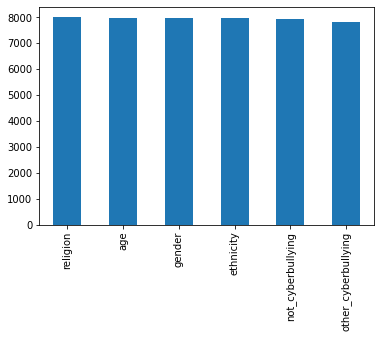

In [19]:
df.cyberbullying_type.value_counts().plot(kind="bar")





In [20]:
###

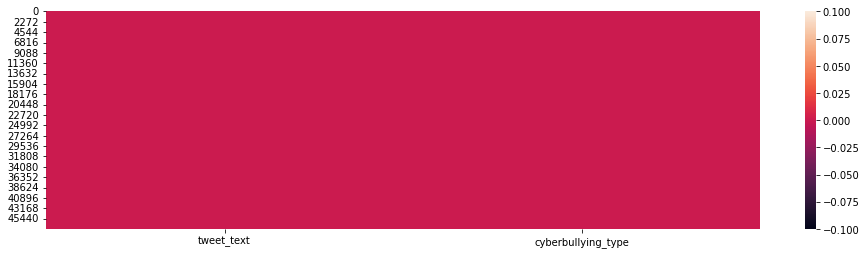

In [21]:
####Visualize missing values of data set
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [22]:
### Decide if features needs to be dropped
#Some important factors which helps to drop feature(s):
#If more than 10% values are empty in a given feature, drop them until it really contributes to EDA
#Some features like person name, ID, pin code, SSN etc. doesnt add much value because they are unique
#There could be 2 features which is similar in nature, choose one of them

In [23]:
## Fill missing values
#Some important factors which helps to fill empty data
#if feature has categorical data then replace empty value using mode()
#if feature has discrete data and range is very less (1-10), go with mode(),because they will be categorical data else go with median()
#if feature has continous data then go with median()

In [24]:
#Find out correlation and perform visualization using heatmap 
# NA

In [25]:
## Find out highly correlated features
#NA

In [26]:
# Find out features which needs type casting
##NA

In [27]:
#Visualize missing values again to make sure that all features are having 0 missing values
#NA

In [28]:
###  Text data cleaning
df.head(3)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying


In [29]:
df.tweet_text[:5]

0    In other words #katandandre, your food was cra...
1    Why is #aussietv so white? #MKR #theblock #ImA...
2    @XochitlSuckkks a classy whore? Or more red ve...
3    @Jason_Gio meh. :P  thanks for the heads up, b...
4    @RudhoeEnglish This is an ISIS account pretend...
Name: tweet_text, dtype: object

In [30]:
df.tweet_text[-5:]

47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, dtype: object

In [31]:
## Remove all non-word form tweet_text
#Lets create lambda function do do bulk text processing
lam= lambda text_data:re.sub("[^a-zA-Z0-9]+"," ",text_data)
lam
    

<function __main__.<lambda>(text_data)>

In [32]:
df.tweet_text.map(lam)

0        In other words katandandre your food was crapi...
1        Why is aussietv so white MKR theblock ImACeleb...
2         XochitlSuckkks a classy whore Or more red vel...
3         Jason Gio meh P thanks for the heads up but n...
4         RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren t expected to do anything depen...
47688    Turner did not withhold his disappointment Tur...
47689    I swear to God This dumb nigger bitch I have g...
47690    Yea fuck you RT therealexel IF YOURE A NIGGER ...
47691    Bro U gotta chill RT CHILLShrammy Dog FUCK KP ...
Name: tweet_text, Length: 47692, dtype: object

In [33]:
df.tweet_text=df.tweet_text.map(lam)

In [34]:
lam1= lambda text_data:" ".join([w for w in text_data.split(" ") if w not in STOPWORDS])
lam1

<function __main__.<lambda>(text_data)>

In [35]:
df.tweet_text.map(lam1)

0               In words katandandre food crapilicious mkr
1        Why aussietv white MKR theblock ImACelebrityAU...
2         XochitlSuckkks classy whore Or red velvet cup...
3         Jason Gio meh P thanks heads concerned anothe...
4         RudhoeEnglish This ISIS account pretending Ku...
                               ...                        
47687    Black ppl aren t expected anything depended an...
47688    Turner withhold disappointment Turner called c...
47689    I swear God This dumb nigger bitch I got bleac...
47690    Yea fuck RT therealexel IF YOURE A NIGGER FUCK...
47691    Bro U gotta chill RT CHILLShrammy Dog FUCK KP ...
Name: tweet_text, Length: 47692, dtype: object

In [39]:
df.tweet_text=df.tweet_text.map(lam1)

In [40]:
para=" ".join(df.tweet_text)

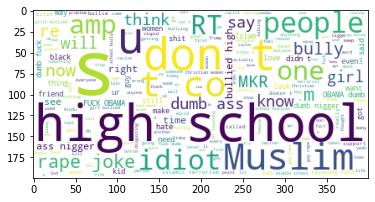

In [42]:
wc=WordCloud(background_color="white")
img=wc.generate_from_text(para)
plt.imshow(img)

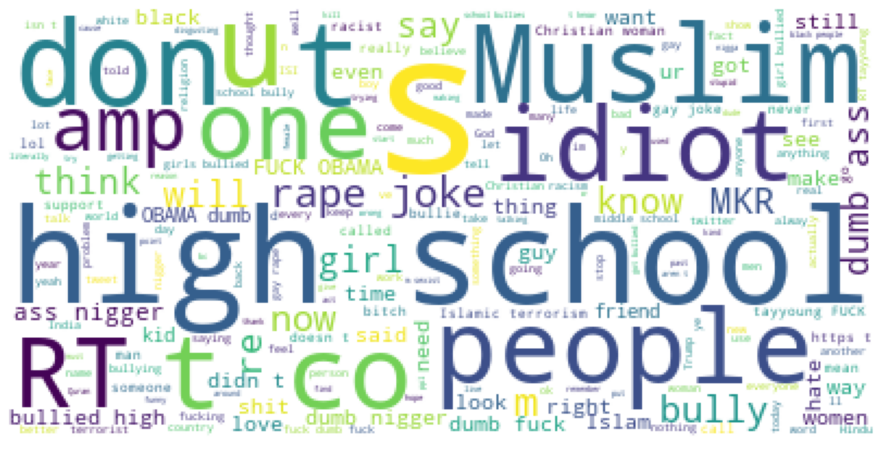

In [45]:
wc=WordCloud(background_color="white")
img=wc.generate_from_text(para)
plt.figure(figsize=(16,8))
plt.axis("off")
plt.imshow(img)

In [46]:
## Infer insights of Data after All the above process are completed using Visualization
## Count of categorical data
df.head(5)

,tweet_text,cyberbullying_type
0,In words katandandre food crapilicious mkr,not_cyberbullying
1,Why aussietv white MKR theblock ImACelebrityAU...,not_cyberbullying
2,XochitlSuckkks classy whore Or red velvet cup...,not_cyberbullying
3,Jason Gio meh P thanks heads concerned anothe...,not_cyberbullying
4,RudhoeEnglish This ISIS account pretending Ku...,not_cyberbullying


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'not_cyberbullying'),
  Text(1, 0, 'gender'),
  Text(2, 0, 'religion'),
  Text(3, 0, 'other_cyberbullying'),
  Text(4, 0, 'age'),
  Text(5, 0, 'ethnicity')])

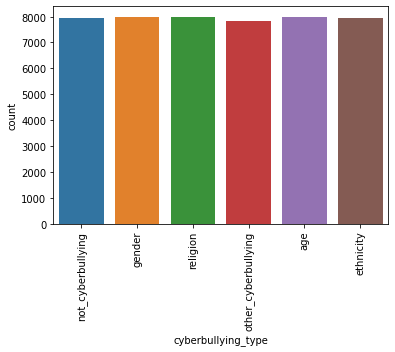

In [47]:
sns.countplot(df.cyberbullying_type)
plt.xticks(rotation=90)

In [48]:
## Histogram for discrete data to understand central tendency of data
# NA

In [49]:
## Correlation between various features
#NA

In [50]:
## Trend of discrete or continious feature (if data available)
# NA

In [51]:
##  KDE plot to see how data is spread
#NA

In [52]:
print(STOPWORDS)

{'those', 'how', "who's", 'below', 'its', "we'd", "she'd", "we've", 'against', 'also', 'most', 'whom', 'their', "i'm", 'com', 'do', "you'll", 'yours', 'very', 'being', "you've", 'yourselves', 'ourselves', 'between', 'he', 'for', 'just', 'else', 'with', "shan't", "he's", 'once', "let's", "why's", 'r', 'up', 'before', 'ever', 'than', 'and', "couldn't", 'we', 'at', 'about', 'were', 'that', "he'd", 'until', 'few', 'because', 'herself', 'myself', 'should', 'my', 'off', "where's", 'here', 'since', "wouldn't", 'her', "we're", 'shall', 'them', 'ours', 'has', 'out', "you'd", 'could', 'ought', 'what', 'can', 'she', 'been', 'all', "there's", 'doing', 'there', 'but', 'so', "can't", 'no', 'again', 'cannot', 'have', 'themselves', "what's", 'theirs', 'otherwise', "wasn't", 'therefore', 'then', 'where', "i've", "they're", 'above', 'into', 'when', 'as', 'this', 'own', 'only', 'having', 'to', "here's", 'on', 'him', "isn't", 'these', 'does', "weren't", 'his', 'himself', 'under', 'nor', 'more', 'who', 'ou

In [53]:
## Lets encode text category to numerical values
## using get_dummies function
pd.get_dummies(data=df,columns=["cyberbullying_type"])

,tweet_text,cyberbullying_type_age,cyberbullying_type_ethnicity,cyberbullying_type_gender,cyberbullying_type_not_cyberbullying,cyberbullying_type_other_cyberbullying,cyberbullying_type_religion
0,In words katandandre food crapilicious mkr,0,0,0,1,0,0
1,Why aussietv white MKR theblock ImACelebrityAU...,0,0,0,1,0,0
2,XochitlSuckkks classy whore Or red velvet cup...,0,0,0,1,0,0
3,Jason Gio meh P thanks heads concerned anothe...,0,0,0,1,0,0
4,RudhoeEnglish This ISIS account pretending Ku...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
47687,Black ppl aren t expected anything depended an...,0,1,0,0,0,0
47688,Turner withhold disappointment Turner called c...,0,1,0,0,0,0
47689,I swear God This dumb nigger bitch I got bleac...,0,1,0,0,0,0
47690,Yea fuck RT therealexel IF YOURE A NIGGER FUCK...,0,1,0,0,0,0


In [54]:
#### using replace function its better we just provide the number
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [55]:
df.cyberbullying_type=df.cyberbullying_type.replace({'not_cyberbullying':0,'gender':1,'religion':2,'other_cyberbullying':3,'age':4,'ethnicity':5})

In [56]:
df.head(5)

,tweet_text,cyberbullying_type
0,In words katandandre food crapilicious mkr,0
1,Why aussietv white MKR theblock ImACelebrityAU...,0
2,XochitlSuckkks classy whore Or red velvet cup...,0
3,Jason Gio meh P thanks heads concerned anothe...,0
4,RudhoeEnglish This ISIS account pretending Ku...,0


In [57]:
df.tail(5)

,tweet_text,cyberbullying_type
47687,Black ppl aren t expected anything depended an...,5
47688,Turner withhold disappointment Turner called c...,5
47689,I swear God This dumb nigger bitch I got bleac...,5
47690,Yea fuck RT therealexel IF YOURE A NIGGER FUCK...,5
47691,Bro U gotta chill RT CHILLShrammy Dog FUCK KP ...,5


In [58]:
df.cyberbullying_type.unique() ## we have put the value by replace method to varify that

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [59]:
## Lets visualize complete tweet data in WordCloud by using cyberbullying type
## here we use  gender and religion

In [60]:
new_text=df[df.cyberbullying_type==1]## 1 is  for gender
new_text.head()

,tweet_text,cyberbullying_type
7945,rape real zvasiyana nema jokes drunk gay lesbi...,1
7946,You never saw celebrity say anything Obama B M...,1
7947,ManhattaKnight I mean s gay uses gendered slu...,1
7948,RT Raul Novoa16 AliciaBernardez Alex Aim mecae...,1
7949,Rape rape And fact I read one post guy getting...,1


In [62]:
t2=" ".join(new_text.tweet_text)

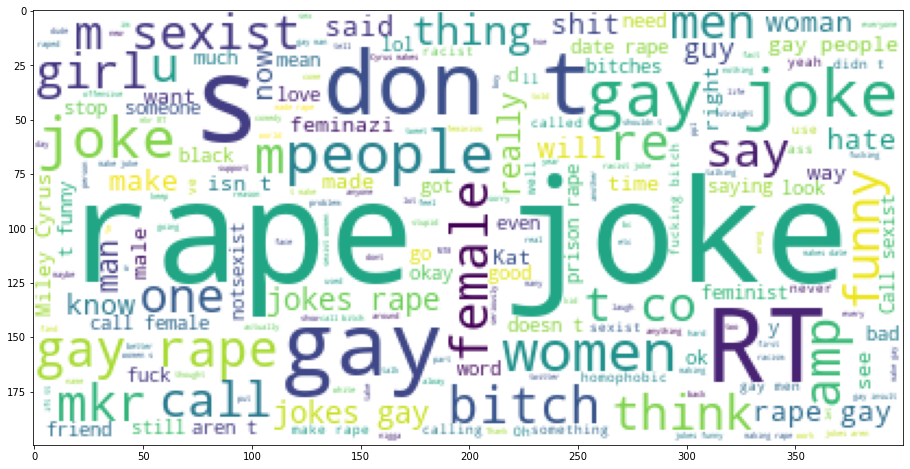

In [63]:
wc=WordCloud(background_color="white")
img=wc.generate_from_text(t2)
plt.figure(figsize=(16,8))
plt.imshow(img)

In [64]:
new_text=df[df.cyberbullying_type==2]## 2 is  for religion
new_text.head()


,tweet_text,cyberbullying_type
15918,Sudeep invite though No right Why getting word...,2
15919,discerningmumin Islam never resistance oppres...,2
15920,Boy comment Journalists wanting keep churches ...,2
15921,ShashiTharoor INCIndia Hindus getting killed ...,2
15922,White supremicists How many know There idiots ...,2


In [65]:
t2=" ".join(new_text.tweet_text)

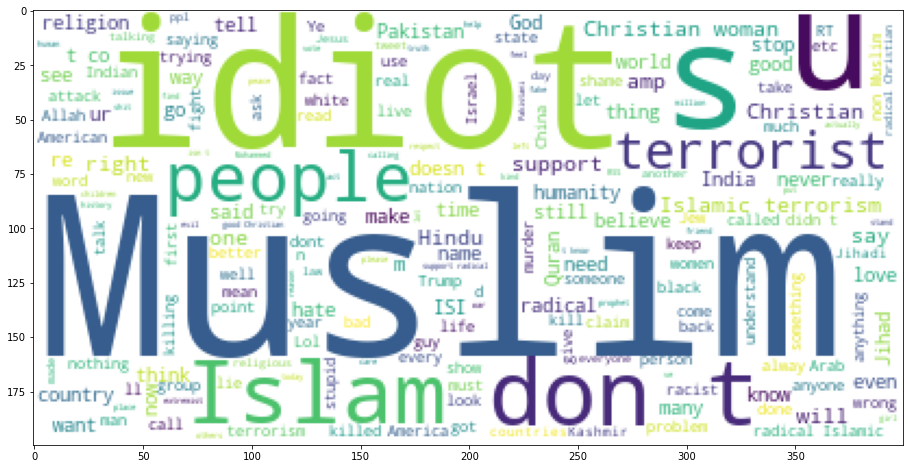

In [66]:
wc=WordCloud(background_color="white")
img=wc.generate_from_text(t2)
plt.figure(figsize=(16,8))
plt.imshow(img)